In [50]:
# Import relevant libraries
import requests
import json
import hvplot.pandas
import pandas as pd
from scipy.stats import linregress
from matplotlib import pyplot as plt
import random


from config import api_key

In [52]:
# Read in data from CSV to DataFrame
path = "../Project_1./NY-House-Dataset.csv"
housing_df = pd.read_csv(path)

In [54]:
# Clean up data
housing_df = housing_df.drop(labels=["MAIN_ADDRESS","ADMINISTRATIVE_AREA_LEVEL_2","LOCALITY","SUBLOCALITY","STREET_NAME","LONG_NAME"], axis = 1)
housing_df.head()

,BROKERTITLE,TYPE,PRICE,BEDS,BATH,PROPERTYSQFT,ADDRESS,STATE,FORMATTED_ADDRESS,LATITUDE,LONGITUDE
0,Brokered by Douglas Elliman -111 Fifth Ave,Condo for sale,315000,2,2.000000,1400.0,2 E 55th St Unit 803,"New York, NY 10022","Regis Residence, 2 E 55th St #803, New York, N...",40.761255,-73.974483
1,Brokered by Serhant,Condo for sale,195000000,7,10.000000,17545.0,Central Park Tower Penthouse-217 W 57th New Yo...,"New York, NY 10019","217 W 57th St, New York, NY 10019, USA",40.766393,-73.980991
2,Brokered by Sowae Corp,House for sale,260000,4,2.000000,2015.0,620 Sinclair Ave,"Staten Island, NY 10312","620 Sinclair Ave, Staten Island, NY 10312, USA",40.541805,-74.196109
3,Brokered by COMPASS,Condo for sale,69000,3,1.000000,445.0,2 E 55th St Unit 908W33,"Manhattan, NY 10022","2 E 55th St, New York, NY 10022, USA",40.761398,-73.974613
4,Brokered by Sotheby's International Realty - E...,Townhouse for sale,55000000,7,2.373861,14175.0,5 E 64th St,"New York, NY 10065","5 E 64th St, New York, NY 10065, USA",40.767224,-73.969856


In [56]:
def plot_lin_regress(x,y,xlabel,ylabel,title,loc):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
    regress_values = x * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.scatter(x,y)
    plt.plot(x,regress_values,"r-")
    plt.annotate(line_eq,loc,fontsize=15,color="red")
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    file_name = title.replace(" ","_")
    plt.savefig("output/"+file_name)
    return rvalue

In [58]:
# General housing graphs

# Bar graphs of housing prices, rooms, etc.

In [60]:
# Pie chart of house types

In [62]:
# Scatter plot comparing price to square footage

#include linear regression

In [64]:
# Geoapify graphs 

# Map of co-ops(?)

In [66]:
#Map of houses

In [68]:
#Map of nearby services (color code?)

In [72]:
# Gather data for distance to school vs price

# Set the parameters for the type of search
limit = 20
radius = 1000
category= "education.school"

# set up a parameters dictionary
params = {
    "limit":limit,
    "apiKey":api_key,  
    "categories":category
}

# Set base URL
base_url = "https://api.geoapify.com/v2/places"

# get sample (change to 100 later)
num_samples = 100
sample_indexes = random.sample(range(0,len(housing_df)),num_samples) 

prices = []
distances = []

print("Getting data. May take a few minutes")

current_count = 1

for index in sample_indexes:
    print(f"Getting nearest school to sample {current_count} of {num_samples}.")
    current_count += 1
   
    latitude = housing_df.loc[index, "LATITUDE"]
    longitude = housing_df.loc[index, "LONGITUDE"]

    filters = f"circle:{longitude},{latitude},{radius}"
    bias = f"proximity:{longitude},{latitude}"

    params["filters"] = filters
    params["bias"] = bias
    nearby_school = requests.get(base_url, params=params)
    nearby_school = nearby_school.json()

    prices.append(housing_df.loc[index, "PRICE"])
    distances.append(nearby_school["features"][0]["properties"]["distance"])

distance_df = pd.DataFrame({"Price (Dollar)": prices, "Distance to Nearest School (Meters)":distances})
print("Finished getting data.")

Getting data. May take a few minutes
Getting nearest school to sample 1 of 100.
Getting nearest school to sample 2 of 100.
Getting nearest school to sample 3 of 100.
Getting nearest school to sample 4 of 100.
Getting nearest school to sample 5 of 100.
Getting nearest school to sample 6 of 100.
Getting nearest school to sample 7 of 100.
Getting nearest school to sample 8 of 100.
Getting nearest school to sample 9 of 100.
Getting nearest school to sample 10 of 100.
Getting nearest school to sample 11 of 100.
Getting nearest school to sample 12 of 100.
Getting nearest school to sample 13 of 100.
Getting nearest school to sample 14 of 100.
Getting nearest school to sample 15 of 100.
Getting nearest school to sample 16 of 100.
Getting nearest school to sample 17 of 100.
Getting nearest school to sample 18 of 100.
Getting nearest school to sample 19 of 100.
Getting nearest school to sample 20 of 100.
Getting nearest school to sample 21 of 100.
Getting nearest school to sample 22 of 100.
Gett

R-Squared equals: 0.020593271795452735


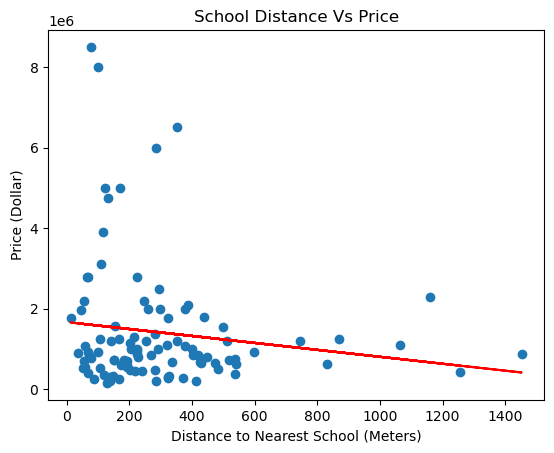

In [74]:
#Scatter plot of data 
rvalue = plot_lin_regress(distance_df["Distance to Nearest School (Meters)"],distance_df["Price (Dollar)"],
                 "Distance to Nearest School (Meters)","Price (Dollar)","School Distance Vs Price",(100,20000000))
print(F"R-Squared equals: {rvalue**2}")
plt.show()

In [ ]:
# Analysis Text

In [ ]:
# References